<b>Contining the previous notebook...</b>

Using TensorFlow backend.


dimensions input: 61878 (observations) x 93 (features)
Nbr of classes: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 846       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
61878/61878 [==============================] - 3s 53us/step - loss: 1.9820
Predicted class 5
Predicted probabilities [0.09464693 0.0898763  0.0852024  0.12658481 0.08289883 0.18468365
 0.10744791 0.11220437 0.11645478]
Nbr of samples in test: 144368


/Users/jandespiegeleer/anaconda/envs/deeplearning/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


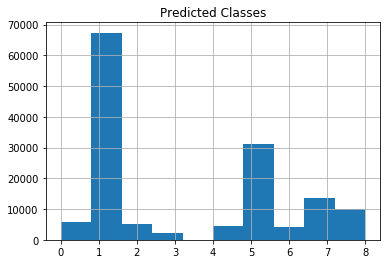

In [1]:
import warnings
warnings.filterwarnings("ignore")
%run ottogroup_initial.ipynb

<h3>Splitting the training data</h3> into training (85%) and test (15%) using the <b>train_test_split</b> method of the sklearn.model_selection module.

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size=0.15, random_state=42)

In [5]:
print('Nbr of samples in training:',X_train.shape[0])
print('Nbr of sample in test:',X_val.shape[0])

Nbr of samples in training: 52596
Nbr of sample in test: 9282


In the fit method of the model we can now pass both training / test data.<br>
The <b>batch size</b> is set to 128. This means that the weights are only changed after processing 128 items in the list.<br>
The <b>epoch</b> is set to 5, which means that the whole data-set passes 5 times through the backpropagation.

In [6]:
model.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 17us/step - loss: 1.8642 - val_loss: 1.8497
Epoch 2/5
52596/52596 [==============================] - 1s 18us/step - loss: 1.8455 - val_loss: 1.8327
Epoch 3/5
52596/52596 [==============================] - 1s 17us/step - loss: 1.8298 - val_loss: 1.8181
Epoch 4/5
52596/52596 [==============================] - 1s 17us/step - loss: 1.8162 - val_loss: 1.8054
Epoch 5/5
52596/52596 [==============================] - 1s 16us/step - loss: 1.8042 - val_loss: 1.7942


<h4>Adding Callback</h4>
Adding callback function 

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

<b>Callback:Early Stopping</b><br>
This is call back function that is such that the model stops improving as soon
as two consecutive times, the loss function (=val loss) has not improved or stayed the same. Two parameters are defined with the model:
<ul>
<li>patience: number of epochs with no improvement after which training will be stopped.
<li>monitor:monitor: quantity to be monitored.
    </ul>

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

<h4>Callback: Storing intermediate output</h4>
The intermedaite networks (with temp weights) are stored on the filepath (fBestModel) in a hdf5 format
it is then afterwards possible to load models from this

In [9]:
fBestModel = './models/weights.{epoch:02d}-{val_loss:.2f}.hdf5' 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

The callback functions are added to the fit method

In [10]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=5, 
          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 17us/step - loss: 1.7935 - val_loss: 1.7841
Epoch 2/5
52596/52596 [==============================] - 1s 22us/step - loss: 1.7839 - val_loss: 1.7750
Epoch 3/5
52596/52596 [==============================] - 1s 26us/step - loss: 1.7752 - val_loss: 1.7666
Epoch 4/5
52596/52596 [==============================] - 1s 21us/step - loss: 1.7672 - val_loss: 1.7590
Epoch 5/5
52596/52596 [==============================] - 1s 23us/step - loss: 1.7598 - val_loss: 1.7519


<h3>Evolution of the loss </h3><br>
The evoluation of the history of the network can be plotted (after defining the appropriate plotfunction)

In [12]:

def plot_history(network_history):
    plt.figure(figsize=(8,8))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])


Since we are running 50 Epochs with batch-sizes of 128, we are going to supress the output of the model on the screen.
But we will make use of the plot function afterwards.

In [13]:
history = model.fit(X_train, Y_train, 
                    validation_data = (X_val, Y_val), 
                    epochs=50,batch_size=128,
                    verbose=False) 

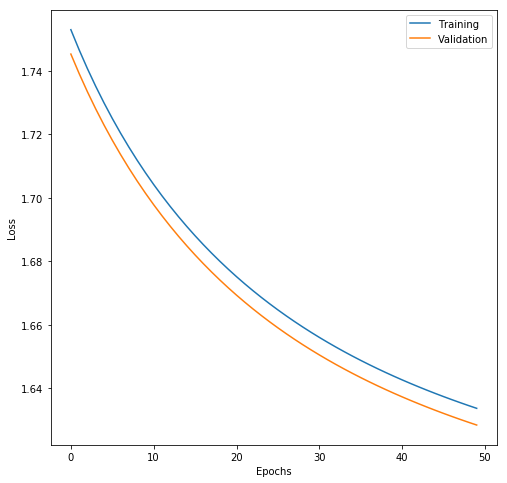

In [14]:
plot_history(history)

<h3>Adding a different initializer to the model</h3>
<br>
We are in full control over the construction of the network. The initialisation of the weights (setting them to zero in this case) is an example of this.

In [15]:
from keras import initializers

model_zero = Sequential()
model_zero.add(Dense(nb_classes, input_shape=(dims[1],), 
                     kernel_initializer=initializers.zeros(), 
                     activation='sigmoid'))
model_zero.add(Activation('softmax'))
model_zero.compile(optimizer='sgd', loss='categorical_crossentropy')

In [16]:
model_zero.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 22us/step - loss: 2.0802 - val_loss: 1.9992
Epoch 2/5
52596/52596 [==============================] - 1s 19us/step - loss: 1.9619 - val_loss: 1.9249
Epoch 3/5
52596/52596 [==============================] - 1s 19us/step - loss: 1.9069 - val_loss: 1.8830
Epoch 4/5
52596/52596 [==============================] - 1s 18us/step - loss: 1.8726 - val_loss: 1.8544
Epoch 5/5
52596/52596 [==============================] - 1s 18us/step - loss: 1.8478 - val_loss: 1.8328


<h3>Adding a dropout layer</h3>
In this example we set a drop layer of 20% just before the first hidden layer. This means that in each feedforward / backpropogation run 20% of the 93 nodes are going to be ignored. 

In [17]:
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dropout(0.2, input_shape=(dims[1],)))
model_drop.add(Dense(nb_classes, activation='sigmoid'))
model_drop.add(Activation('softmax'))
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy')

In [18]:
model_drop.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 22us/step - loss: 2.1584 - val_loss: 2.0868
Epoch 2/5
52596/52596 [==============================] - 1s 19us/step - loss: 2.0504 - val_loss: 2.0011
Epoch 3/5
52596/52596 [==============================] - 1s 21us/step - loss: 1.9869 - val_loss: 1.9483
Epoch 4/5
52596/52596 [==============================] - 1s 20us/step - loss: 1.9452 - val_loss: 1.9127
Epoch 5/5
52596/52596 [==============================] - 1s 20us/step - loss: 1.9154 - val_loss: 1.8860
